In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

from check_collision import check_all_collisions
from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'

ribs = [Rib([[-101.,151.],[-99.,151.],[-99.,150.],[-101.,150.]]) , Rib([[1001.,151.],[999.,151.],[999.,150.],[1001.,150.]]) ,Rib(np.asarray([[-1000.,0],[1000.,0],[1000.,-100.],[-1000.,-100.]]))]
    


ModuleNotFoundError: No module named 'ipympl'

In [ ]:
plt.close('all') 

runs/rib50_Q40_1/BDF_RK23_200_[0.6, 0.7]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.7, 0.8]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[8.0, 9.0]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[9.0, 10.0]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.06, 0.07]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.05, 0.06]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.9, 1.0]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.2, 0.3]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.09, 0.1]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.8, 0.9]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[3.0, 4.0]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[1.0, 2.0]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.5, 0.6]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[5

/tmp/ipykernel_382026/1958164522.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax  = plt.subplots()


runs/rib50_Q40_1/BDF_RK23_200_[6.0, 7.0]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[0.07, 0.08]_1_1e-01_linear_test1.9.22.pickle
runs/rib50_Q40_1/BDF_RK23_200_[10.0, 12.0]_1_1e-01_linear_test1.9.22.pickle


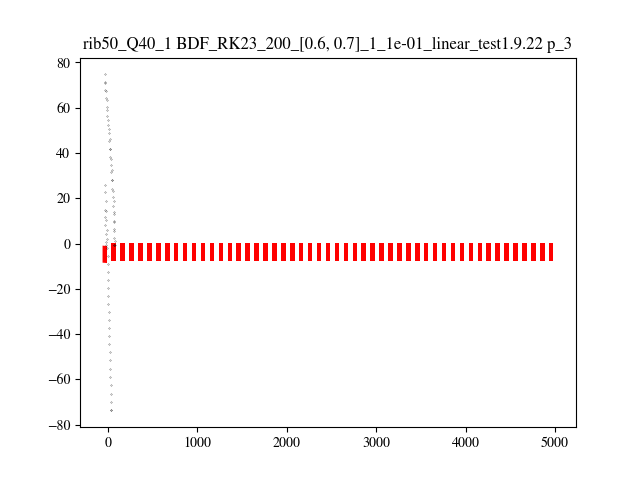

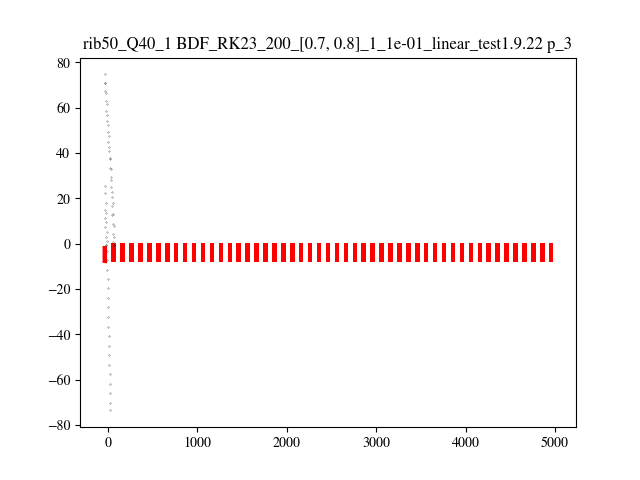

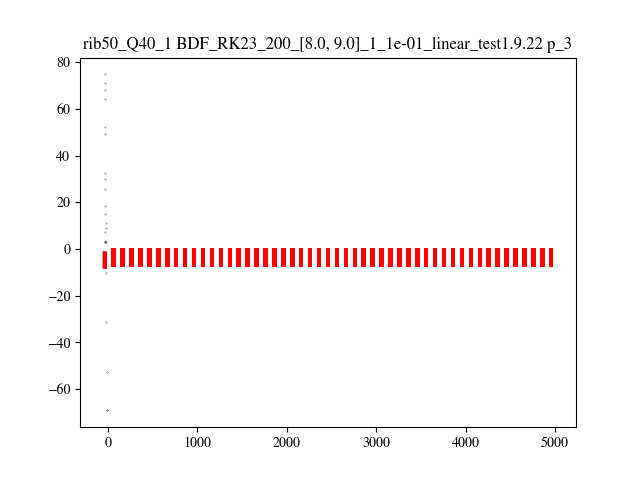

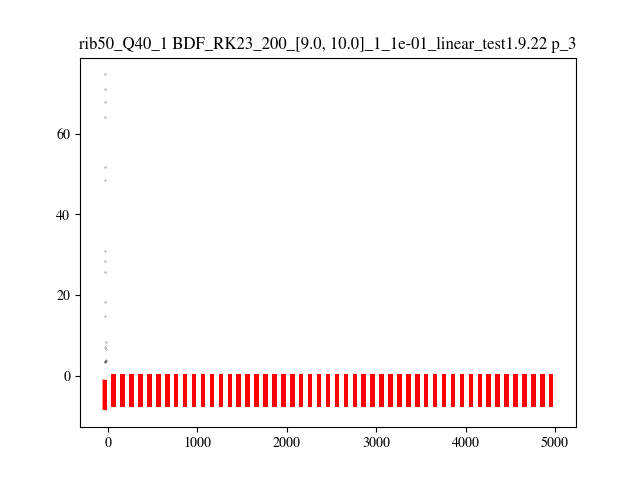

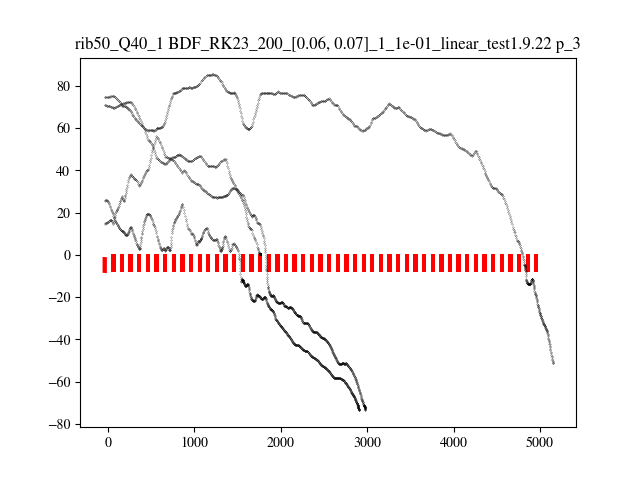

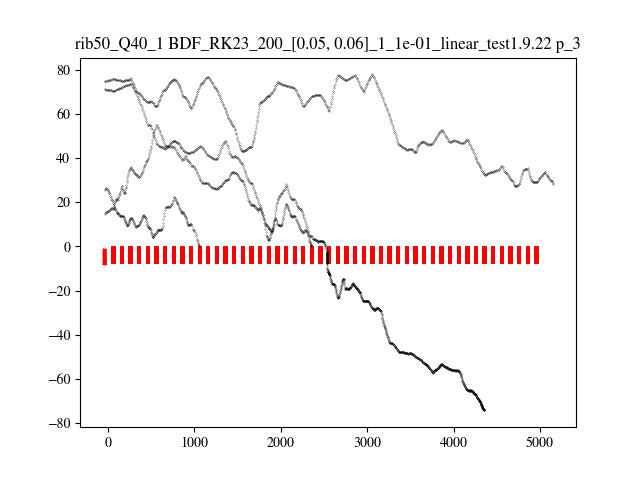

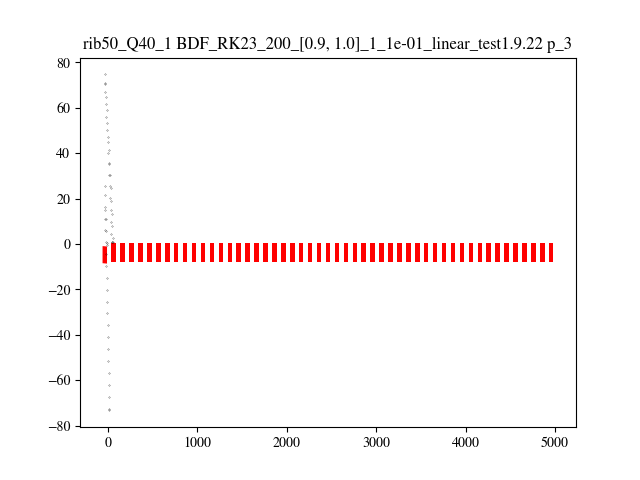

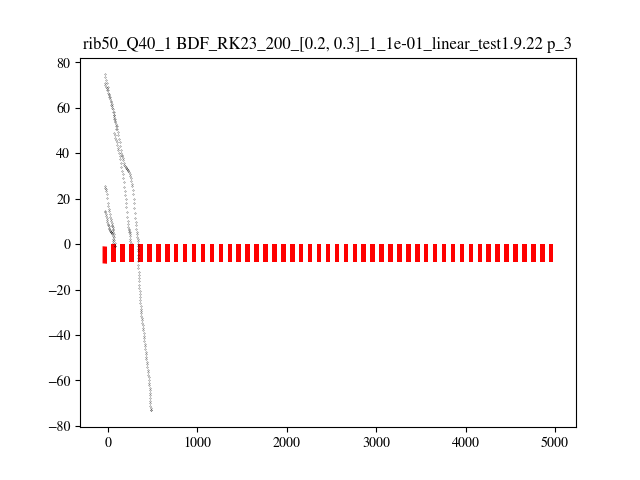

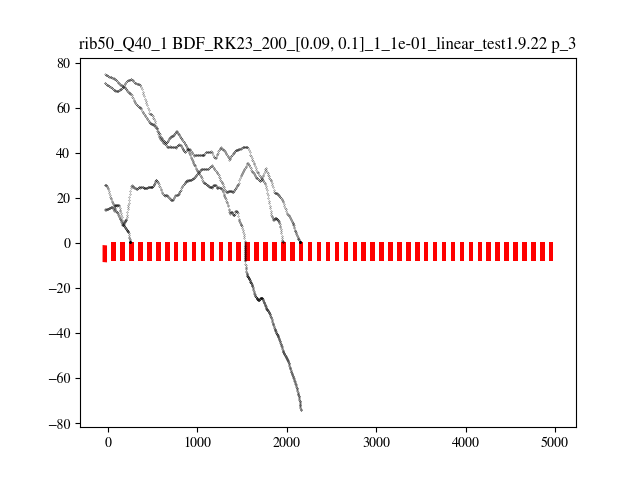

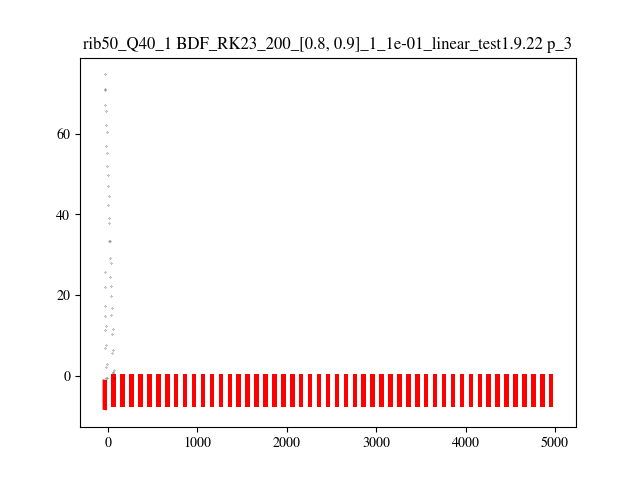

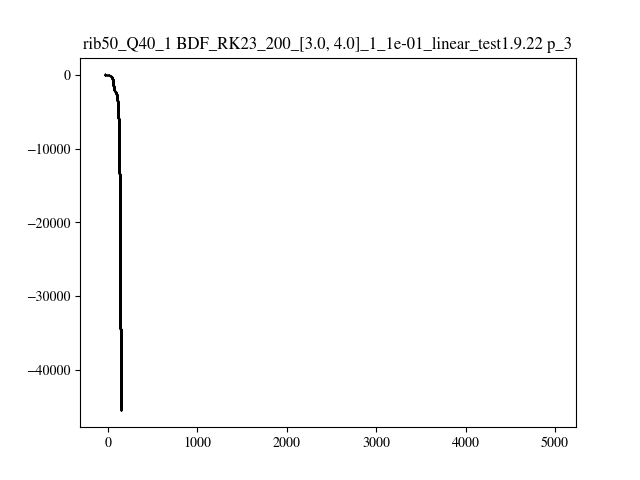

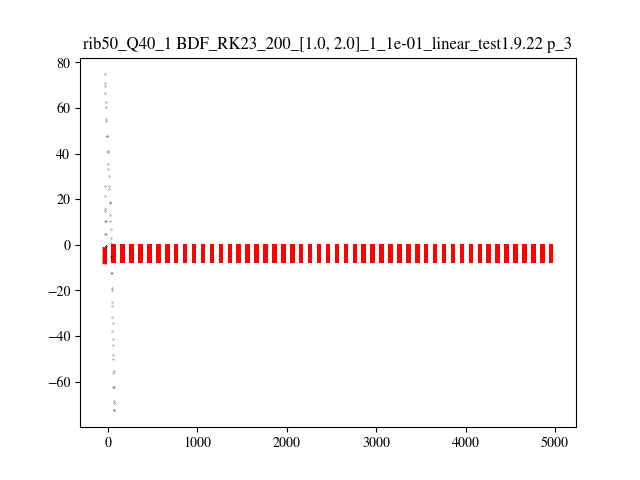

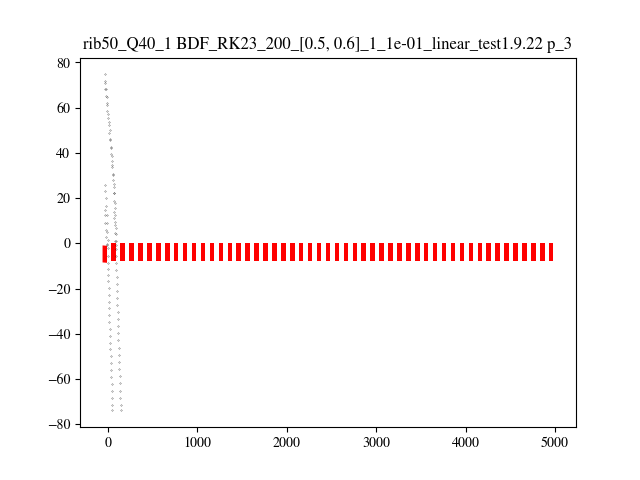

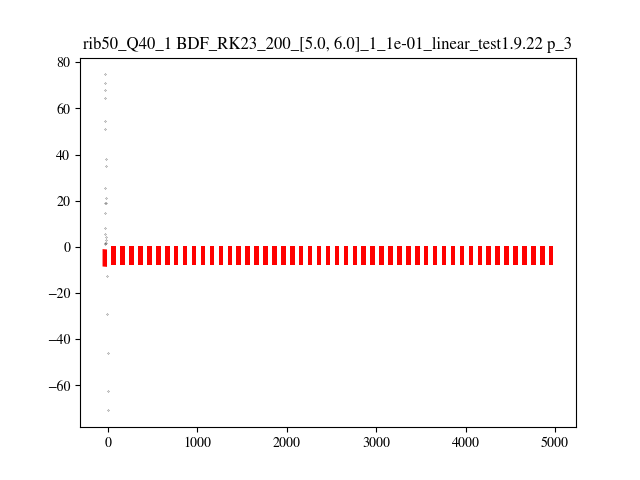

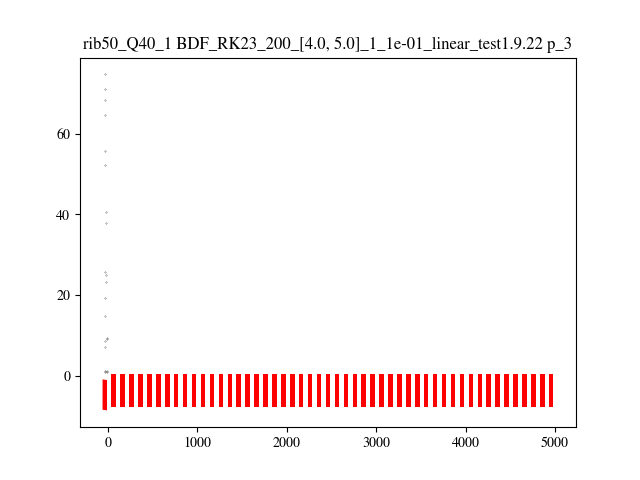

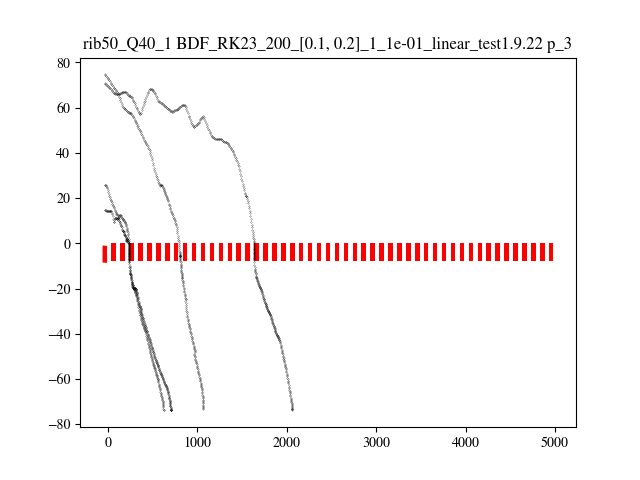

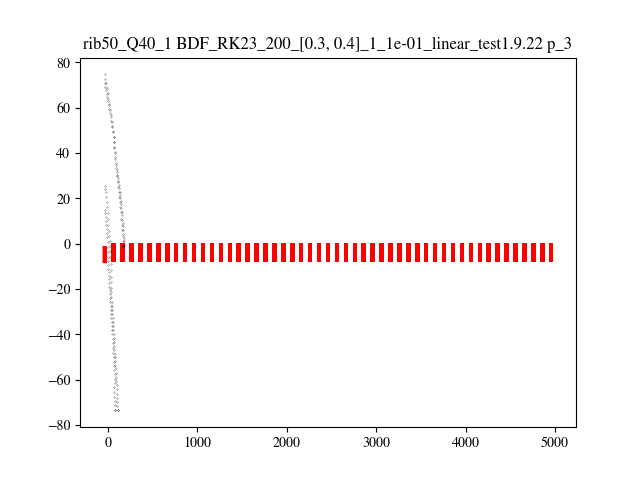

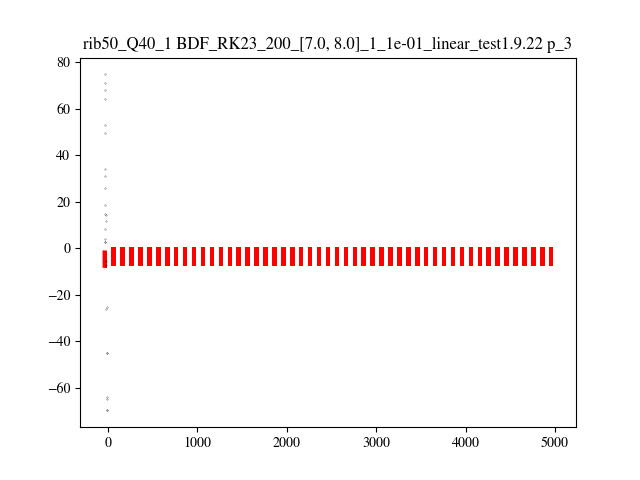

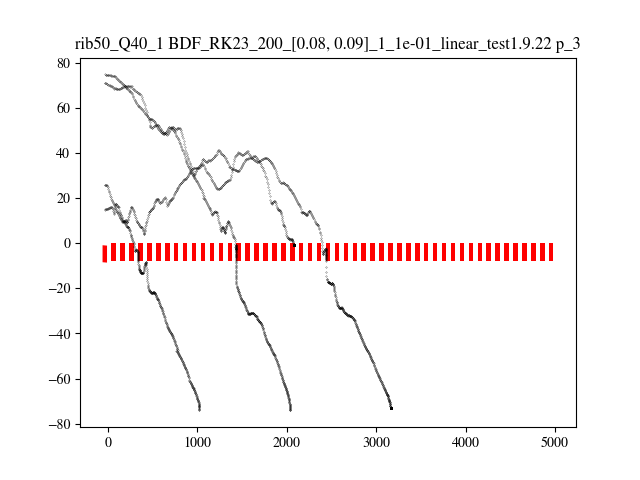

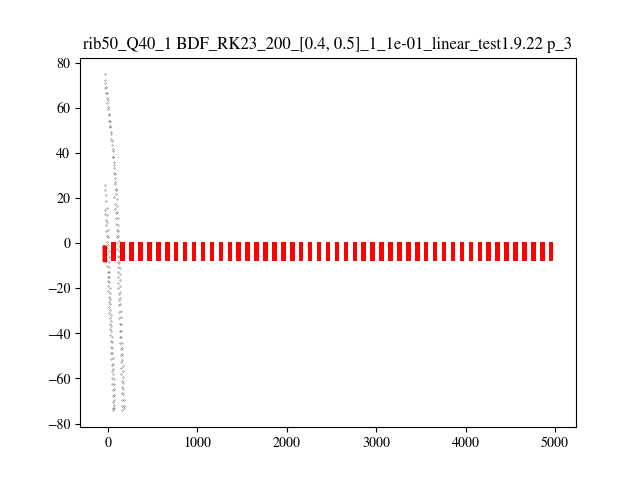

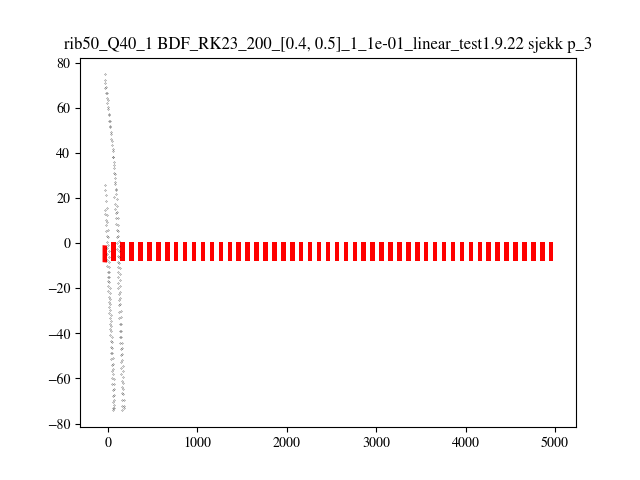

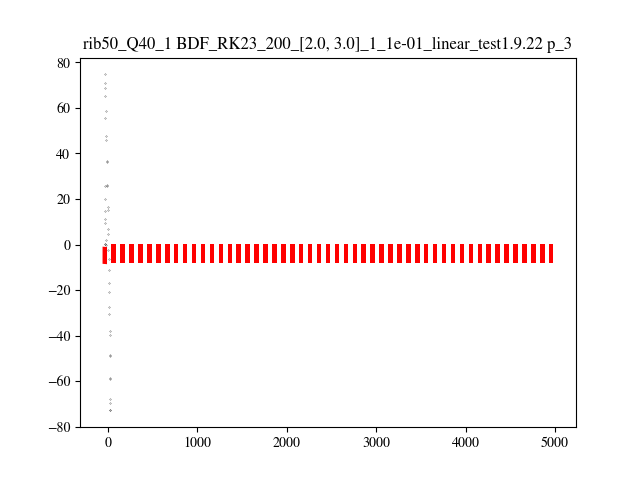

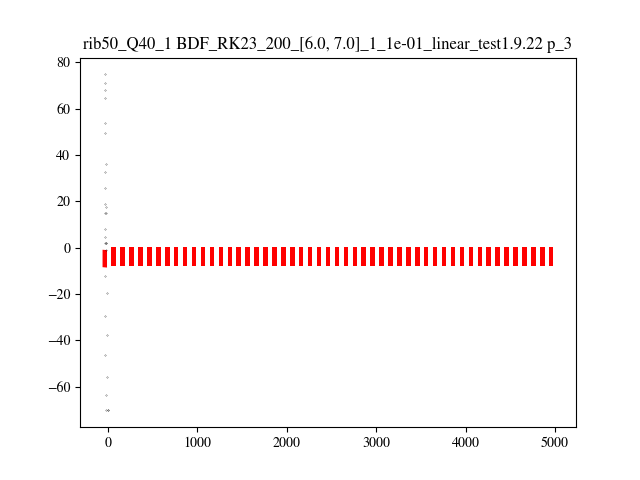

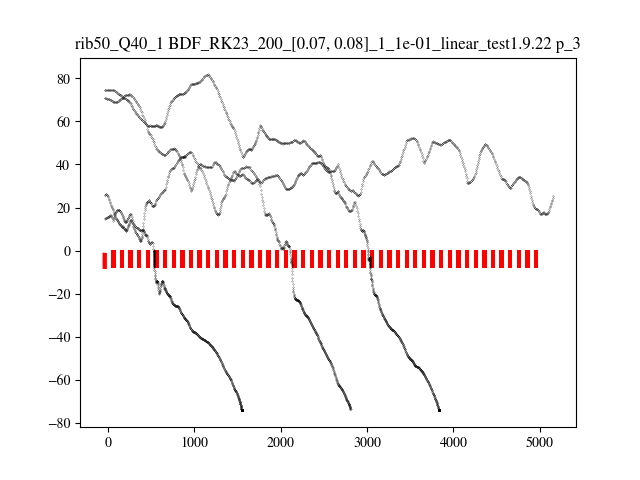

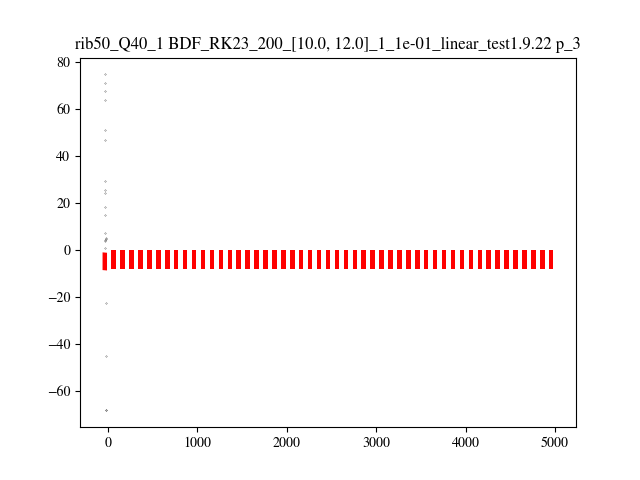

In [ ]:
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in Path("./runs/analytisk/").glob("RK45_RK23_200_[*"):
    print(partikkelfil)
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)
    skalering = 1
    myDPI = 300

    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots()
    # ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
    # ax.add_patch(Polygon(ribs[1].vertices, facecolor='red'))

    for p in partiklar:
        sti = p.sti_dict
        init = int(sti['init_time'])
        final = int(sti['final_time'])
        plott_array = np.zeros((final+1-init,4))
        for frame in range(init,final+1):
            plott_array[frame-init,:] = np.asarray(sti[frame]['position'])#+np.asarray([sti[frame]['loops']*x_width,0,0,0])
    # if not np.any(plott_array[:,1]<0):
        #     continue

        ax.plot(plott_array[:,0], plott_array[:,1], "ko", markersize=0.2)

        ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
        # if p.index > 0:
        #     break